# Reproducibility

## Methods and experiment

Iris data set


KNN classifier
First we pick a value for K.
Search for the K observations in the training data that are "nearest" to the measurements of the unknown iris, 
thats is distance between instance and all other training instances is computed.
Use the most popular response value from the K nearest neighbors as the predicted response value for generalization
KNN would search for one nearest observation and find that exact same observation
KNN has memorized the training set since experiment is based on the exact same data, it would always make the same prediction.

In [2]:
#Importing packages
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.utils import resample, shuffle
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split

In [3]:
#Importing iris dataset and setting seed
np.random.seed(3)
iris = load_iris()
#df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                  #columns= iris['feature_names'] + ['flower'])
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None)

In [4]:
#Checking data
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Fixing the column names
df.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'flower']

In [6]:
#Shuffle the data and split it into x and y, standardising x since KNN is sensitive
# to size.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = shuffle(df)
x = df.iloc[:, :-1]
print(x.head())
x = pd.DataFrame(scaler.fit_transform(x))
x.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']
y = df.iloc[:,-1]
print(x.head())

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
47                4.6               3.2                1.4               0.2
3                 4.6               3.1                1.5               0.2
31                5.4               3.4                1.5               0.4
25                5.0               3.0                1.6               0.2
15                5.7               4.4                1.5               0.4
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -1.506521          0.337848          -1.341272         -1.312977
1          -1.506521          0.106445          -1.284407         -1.312977
2          -0.537178          0.800654          -1.284407         -1.050031
3          -1.021849         -0.124958          -1.227541         -1.312977
4          -0.173674          3.114684          -1.284407         -1.050031


In [ ]:
#Now we split our data into a training and test set
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y, test_size=0.2)

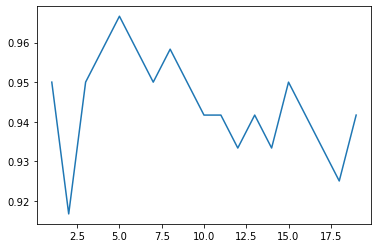

In [25]:
#We now perform 5-fold cross validation to find the optimal k
k_vals = np.arange(1, 20)
validation_error = [cross_val_score(KNeighborsClassifier(n_neighbors=k), x_train, y_train, cv=5)
                for k in k_vals]
plt.plot(k_vals, [val.mean() for val in validation_error])

In [14]:
#We see that k=5 has the highest score while being as simple as possible.
#Our test error is then
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9333333333333333

## Discussion

How close to the reported accuracy do you expect its performance to be in reality? 
What are the factors that might cause it to deviate?

AttributeError: 'list' object has no attribute 'mean'

C:\Users\shuvo\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 74     Iris-versicolor
31         Iris-setosa
125     Iris-virginica
111     Iris-virginica
147     Iris-virginica
            ...       
30         Iris-setosa
139     Iris-virginica
32         Iris-setosa
4          Iris-setosa
68     Iris-versicolor
Name: flower, Length: 120, dtype: object

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0F73D108> (for post_execute):


TypeError: iteration over a 0-d array

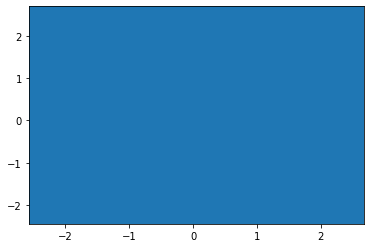

In [11]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

k_vals = np.arange(1, 21)
validation_error = []
random.seed(10)
for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k)
    
    
    # We will plot the decision boundary in the space of
    # sepal length and petal length. We will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    model.fit(x_train[["petal length (cm)", "petal width (cm)"]], y_train)
    
    h = .02 #step size in mesh
    plot_x = np.array(x_train["petal length (cm)"])
    plot_y = np.array(x_train["petal width (cm)"])
    x_min, x_max = float(plot_x.min() - 1), float(plot_x.max() + 1)
    y_min, y_max = float(plot_y.min() - 1), float(plot_y.max() + 1)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()]))
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(plot_x, plot_y, c=y_train, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)"
              % (k))
    #plt.show()